In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\santo\OneDrive\Desktop\Velocity\CSV Files\insurance - insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df["region"]=df["region"].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
263,19,1,36.955,0,1,2,36219.40545
1199,31,0,25.800,2,0,0,4934.70500
1330,57,0,25.740,2,0,1,12629.16560
1265,64,1,23.760,0,1,1,26926.51440
656,26,0,42.400,1,0,0,3410.32400


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


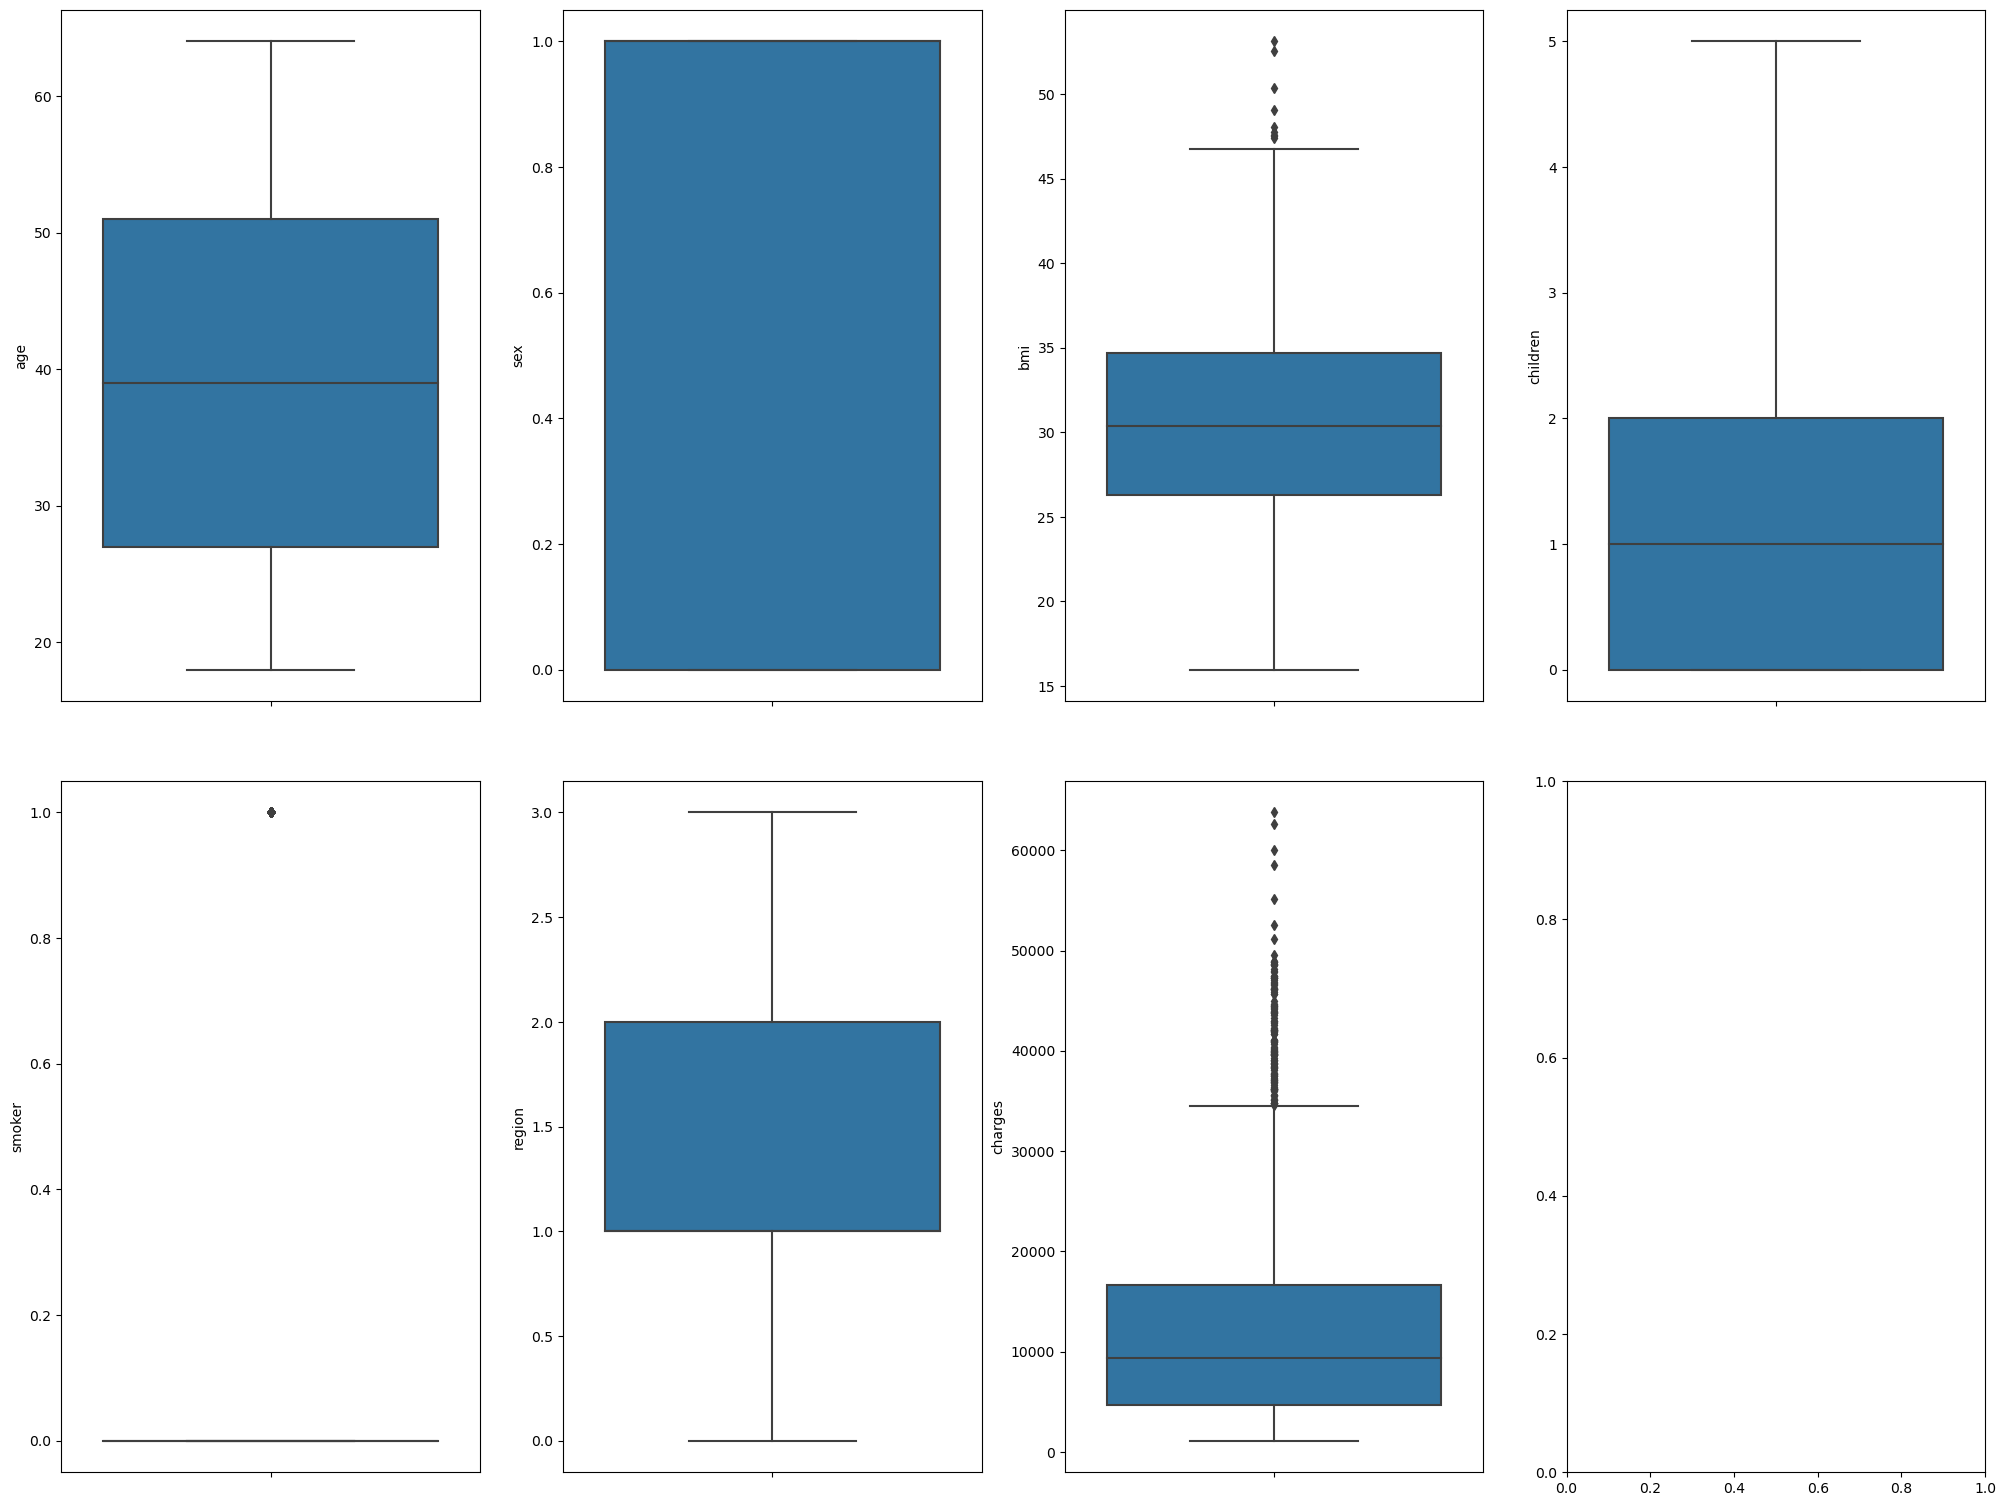

In [12]:
# create box plot
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [13]:
lower_bound=df["bmi"].mean()- 3*(df["bmi"].std())
Upper_bound=df["bmi"].mean()+ 3*(df["bmi"].std())
df=df[(df["bmi"]<Upper_bound) & (df["bmi"]>lower_bound)]
lower_bound=df["charges"].mean()- 3*(df["charges"].std())
Upper_bound=df["charges"].mean()+ 3*(df["charges"].std())
df=df[(df["charges"]<Upper_bound) & (df["charges"]>lower_bound)]

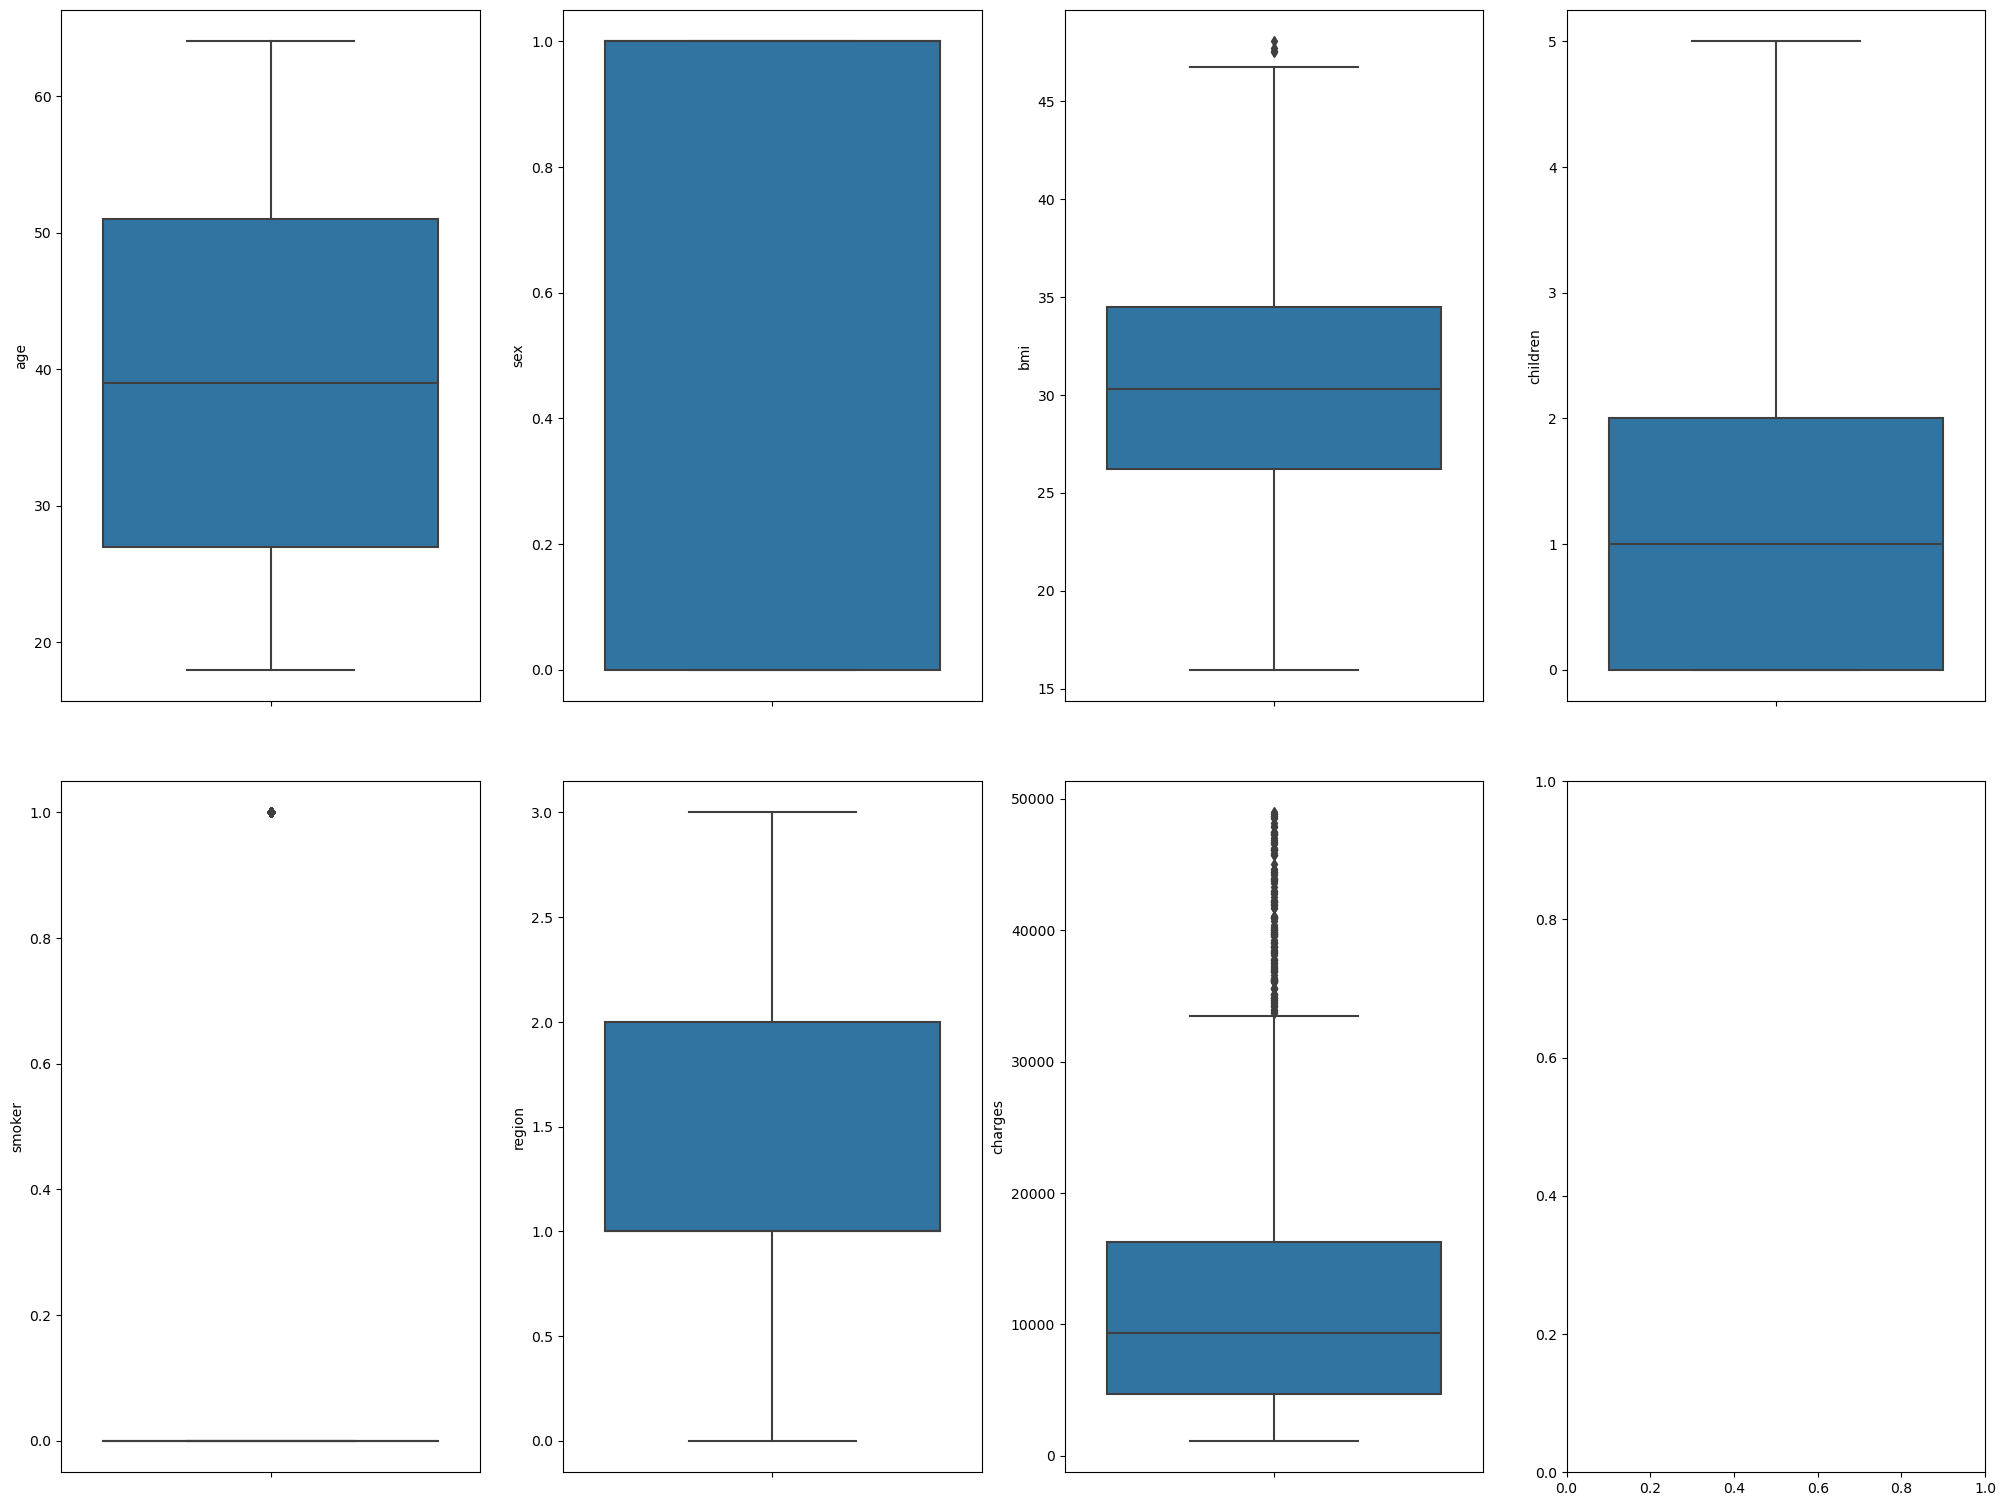

In [14]:
# create box plot
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [15]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

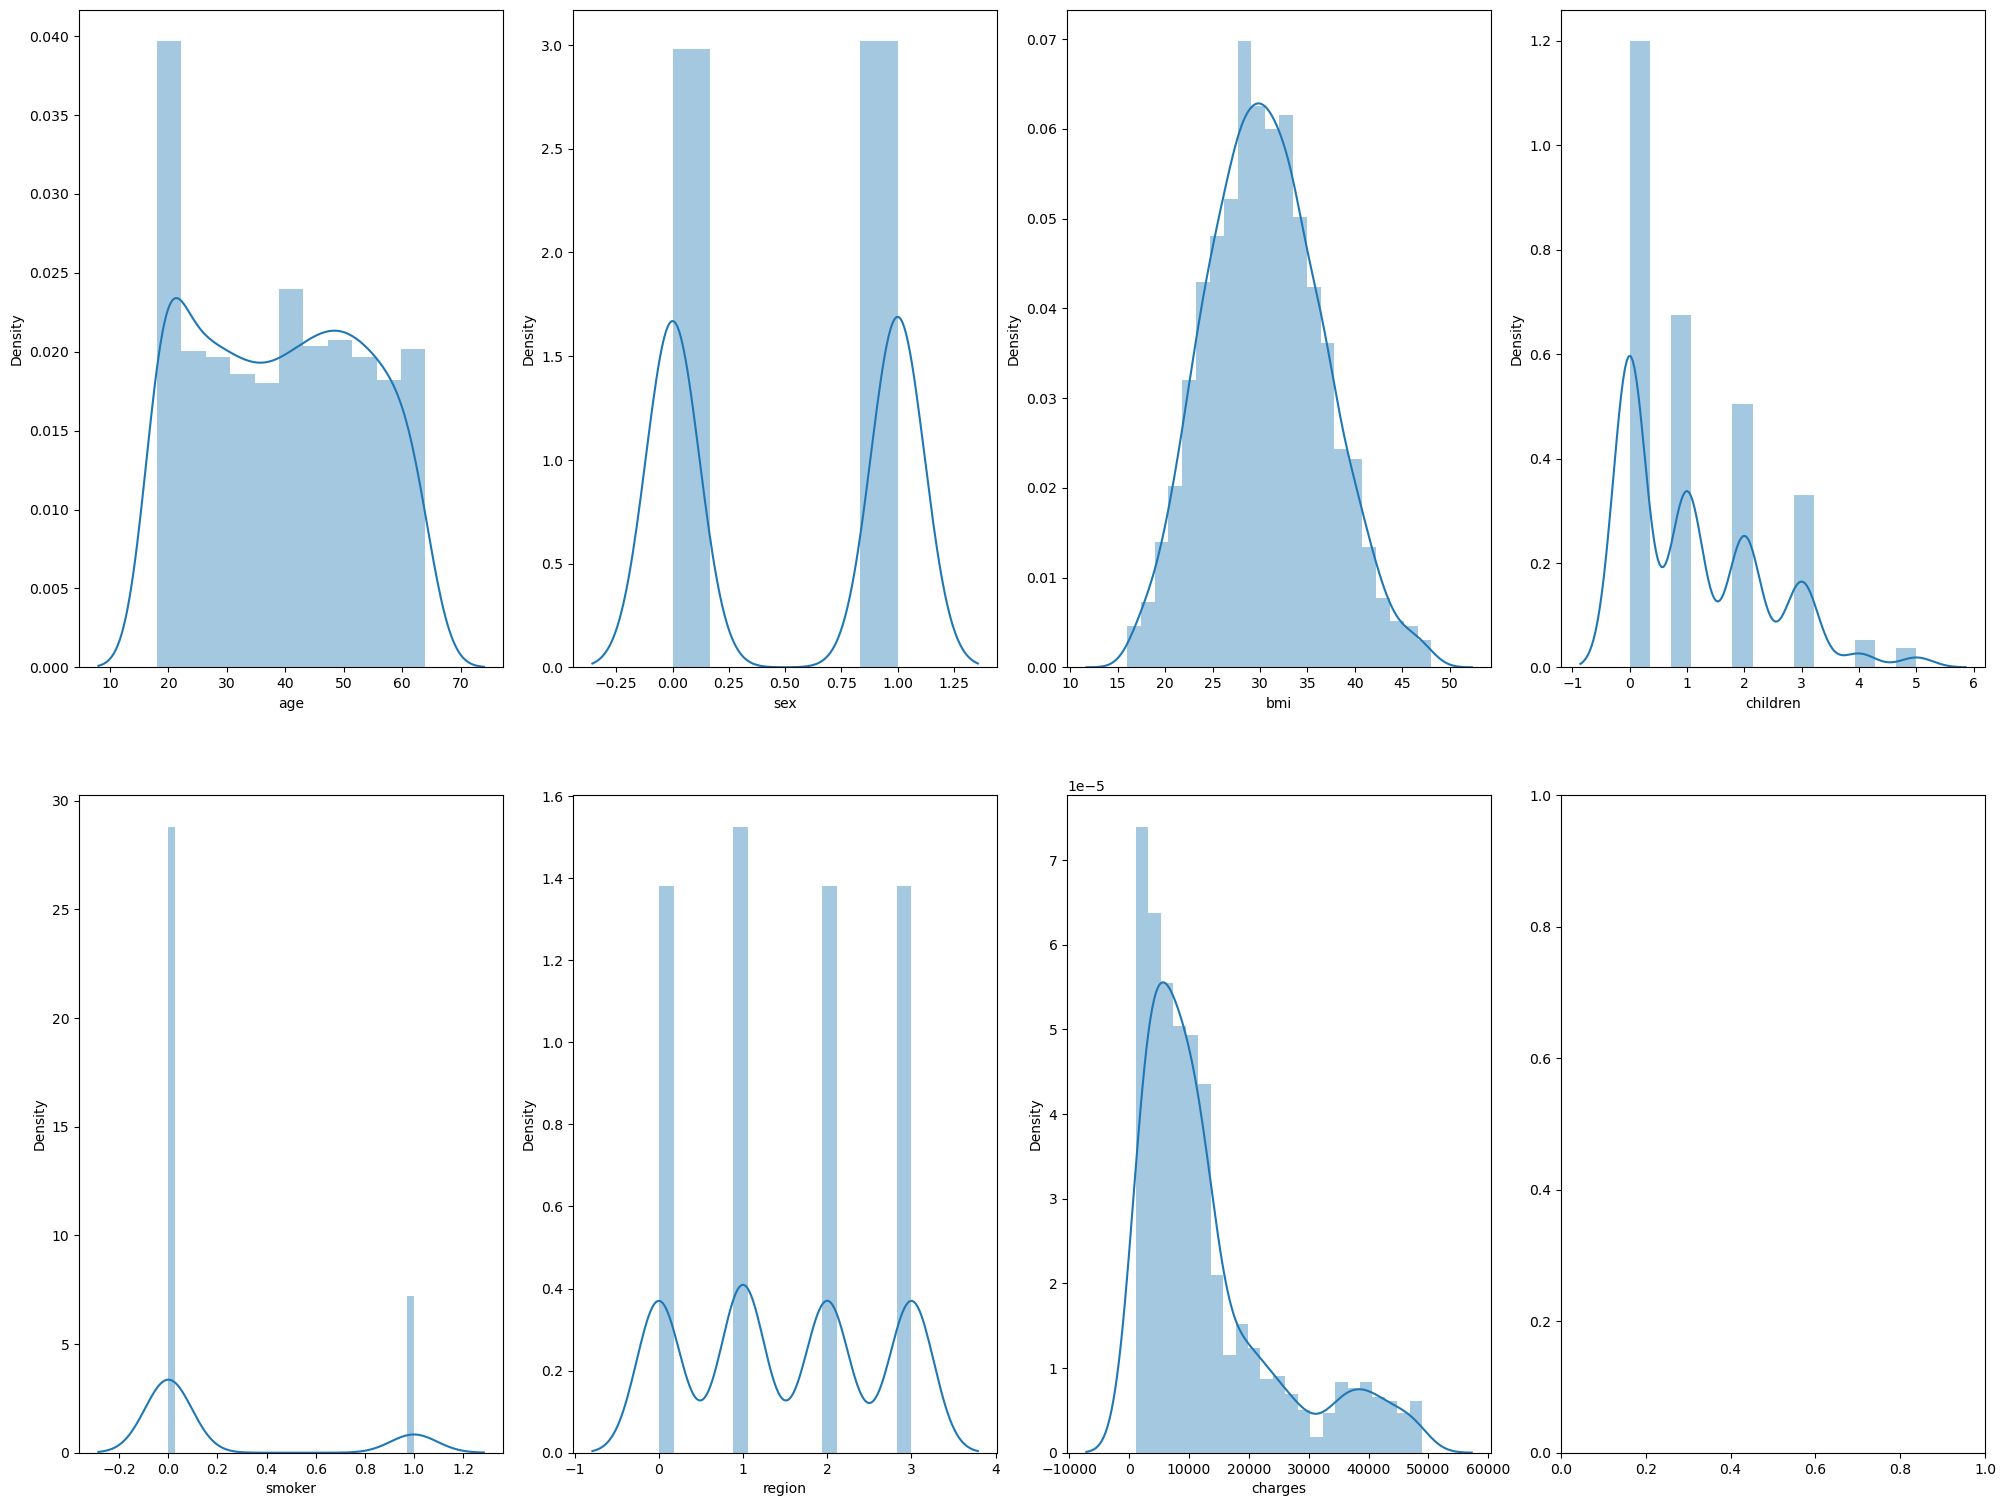

In [16]:
# create dist plot
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.distplot(j,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [17]:
#log transformation
df["children"]= np.log(1+df["children"])


In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,1,0,16884.92400
1,18,1,33.770,0.693147,0,1,1725.55230
2,28,1,33.000,1.386294,0,1,4449.46200
3,33,1,22.705,0.000000,0,2,21984.47061
4,32,1,28.880,0.000000,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0,2,10600.54830
1334,18,0,31.920,0.000000,0,3,2205.98080
1335,18,0,36.850,0.000000,0,1,1629.83350
1336,21,0,25.800,0.000000,0,0,2007.94500


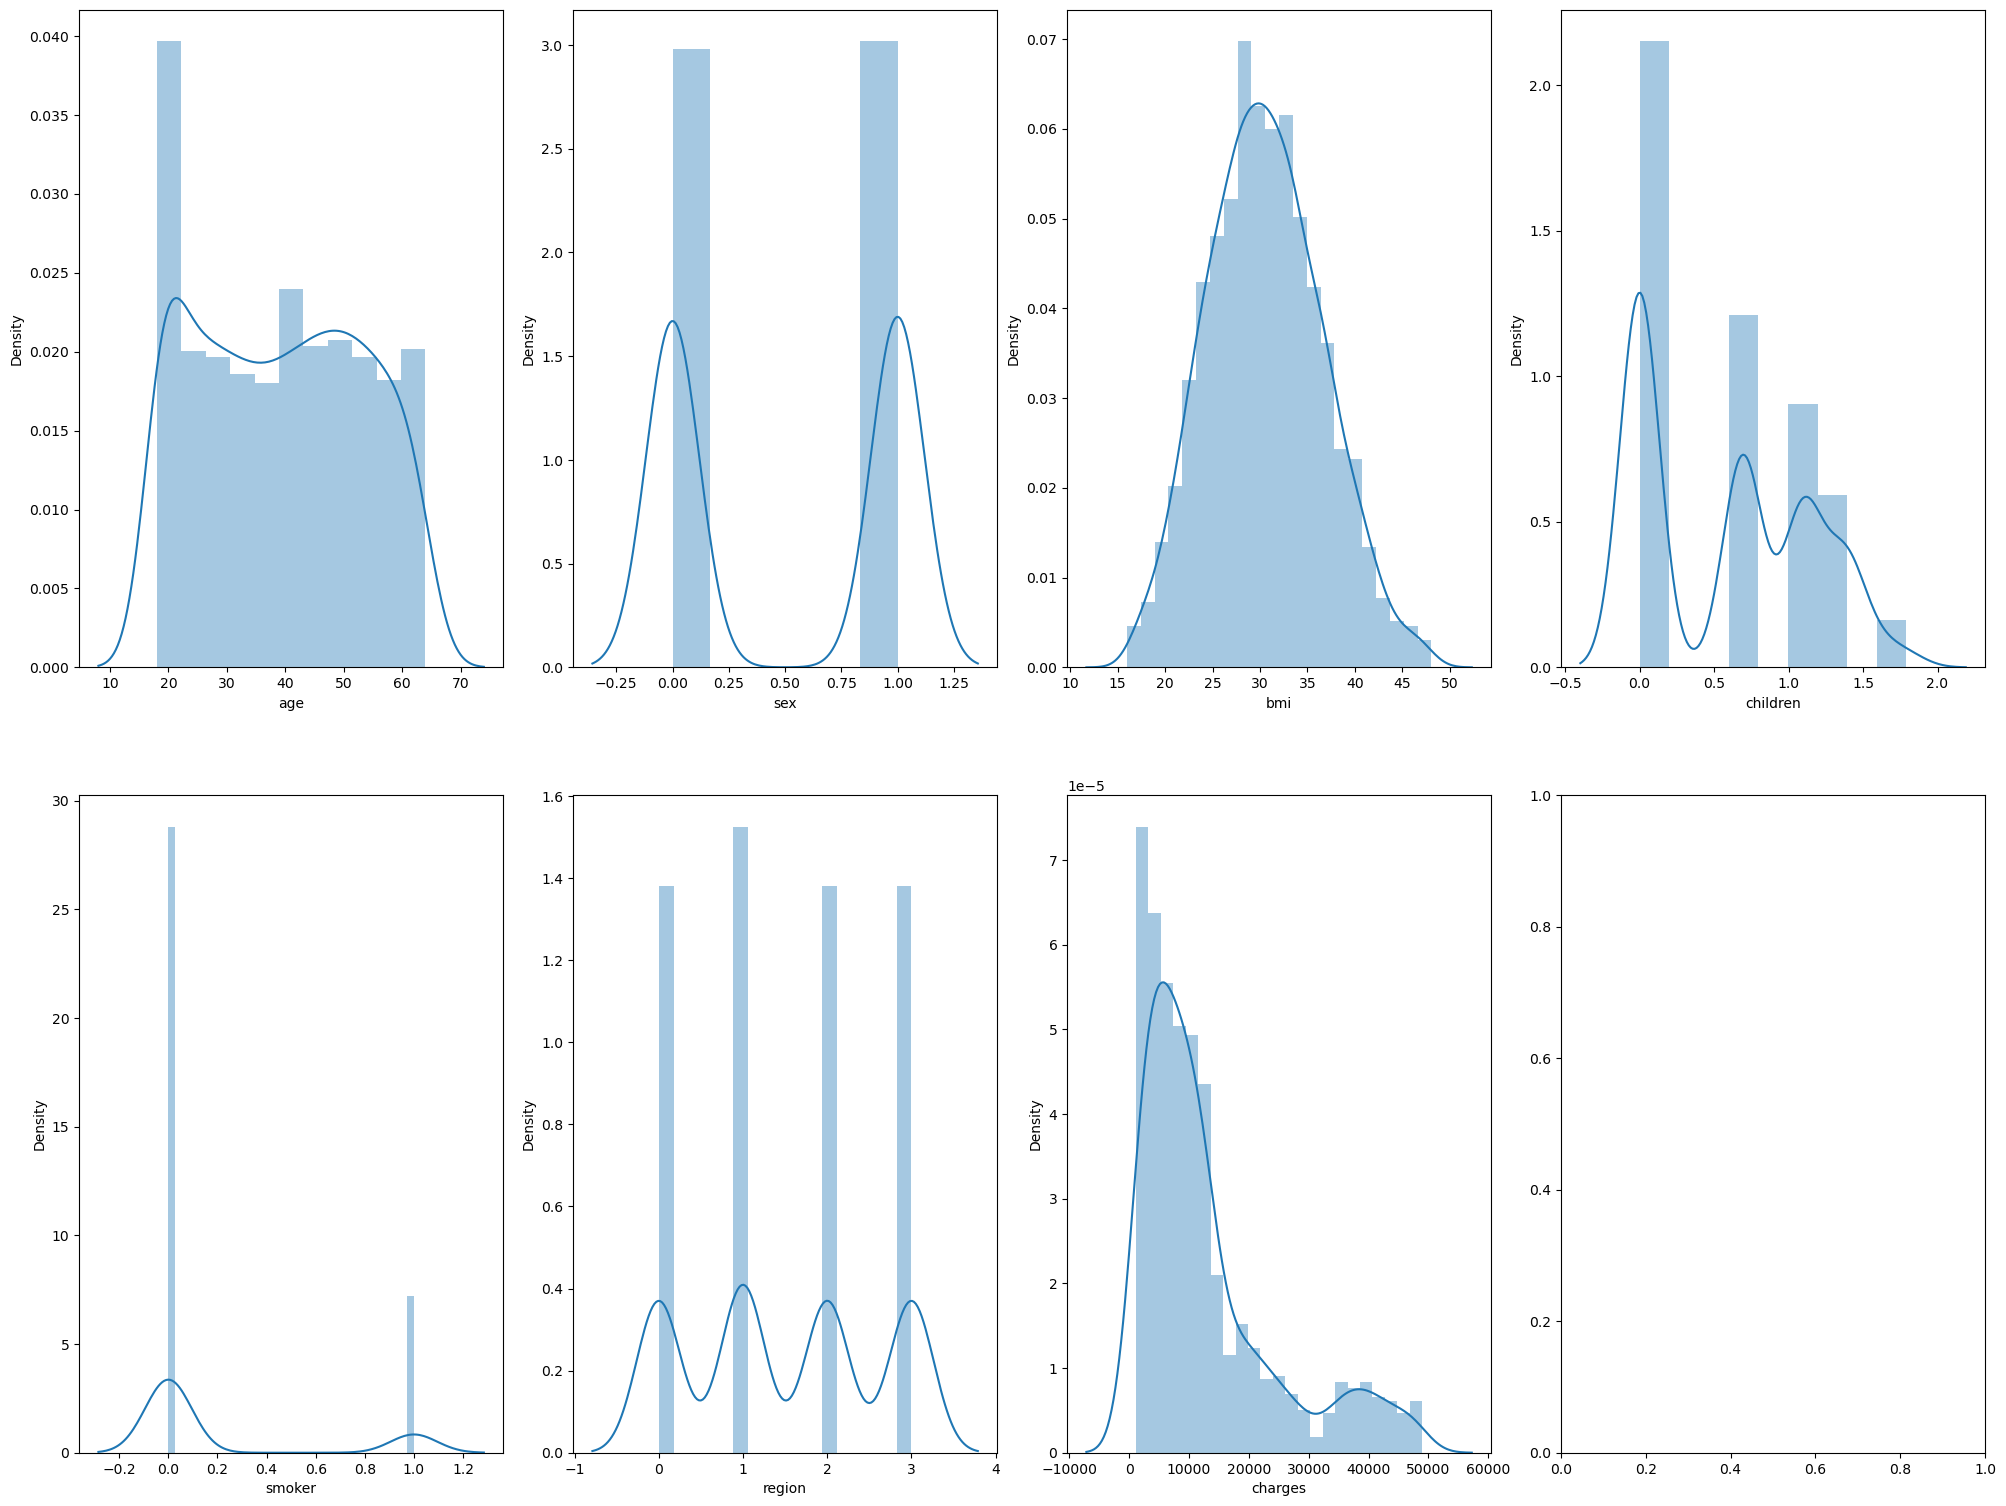

In [19]:
# create dist plot
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.distplot(j,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

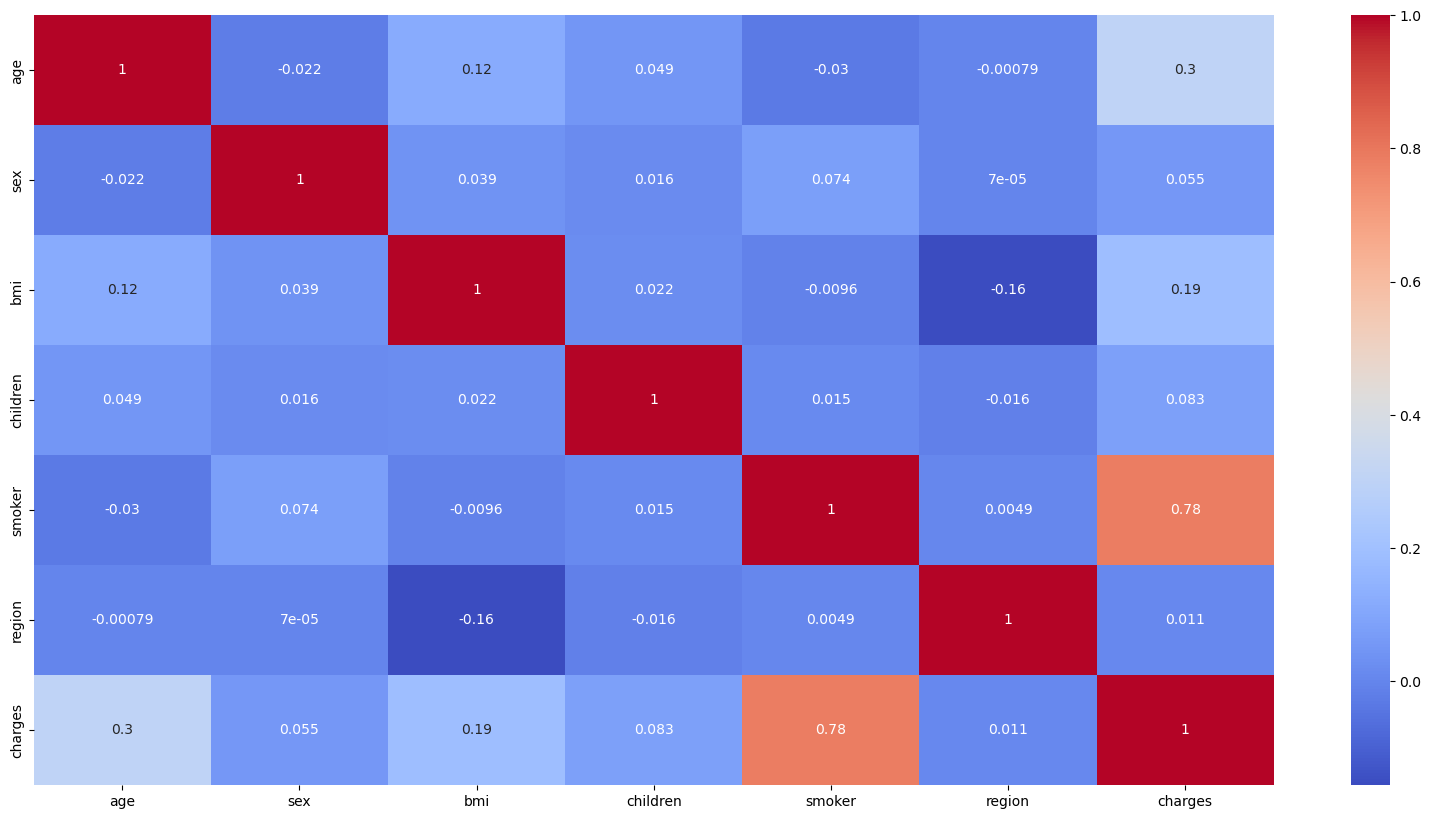

In [20]:
corr =df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [21]:
x=df.drop(columns=["charges"])
y=df["charges"]

In [22]:
#split data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)

In [23]:
LR=LinearRegression().fit(x_train,y_train)

In [24]:
def Linear_Regression(x,y):

    from sklearn import metrics
    #prediction
    y_test_pred=LR.predict(x_test) 
    y_train_pred=LR.predict(x_train)
    
    #Evaluate R2 and adjusted R2
    test_r2=LR.score(x_test,y_test)
    train_r2=LR.score(x_train,y_train)
    
    n_train=x_train.shape[0]  
    p_train=x_train.shape[1]
    
    n_test=x_test.shape[0]  
    p_test=x_test.shape[1]
    
    test_adj_r2=1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
    
    train_adj_r2=1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)
    
    MSE=metrics.mean_squared_error(y_test,y_test_pred)
    MAPE=metrics.mean_absolute_percentage_error(y_test,y_test_pred)
    MAE=metrics.mean_absolute_error(y_test,y_test_pred)
    RMSE=np.sqrt(MSE)
    MAPE_in_percentage=100-(MAPE*100)
    
    #making final answer in dataframe
    index=["R2 score Training",
         "Adjusted R2 score training",
         "R2 score Testing",
         "Adjusted R2 score testing",
         "MSE",
         "MAE",
         "RMSE",
         "Accuracy in % (MAPE)"]
    values=np.array([[train_r2],
                     [train_adj_r2],
                     [test_r2],
                     [test_adj_r2],
                     [MSE],
                     [MAE],
                     [RMSE],
                     [MAPE_in_percentage]])
    
    Answer=pd.DataFrame(data=values,index=index,columns=["Values"],dtype="float")
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    return Answer

display(Linear_Regression(x,y))

,Values
R2 score Training,0.75
Adjusted R2 score training,0.75
R2 score Testing,0.74
Adjusted R2 score testing,0.73
MSE,35580423.07
MAE,4020.29
RMSE,5964.93
Accuracy in % (MAPE),64.65


In [25]:
import pickle
pickle.dump(LR,open("charges.pkl","wb"))

In [26]:
LR.predict(np.array([[22,0,33,1,0,2]]))

array([5156.48228146])